In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', None)

# Step 1: Load the data

In [3]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import gdown


In [5]:
file_id = '1jRWdxmXHFpmX06oP0aDLoOW_HrLaRpcU'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'steam2024.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1jRWdxmXHFpmX06oP0aDLoOW_HrLaRpcU
From (redirected): https://drive.google.com/uc?id=1jRWdxmXHFpmX06oP0aDLoOW_HrLaRpcU&confirm=t&uuid=4ff0f9a9-7c2c-44d2-8e02-6eab05e176cb
To: c:\Users\ali_s\Downloads\steam2024.csv
100%|██████████| 422M/422M [00:21<00:00, 19.7MB/s] 


'steam2024.csv'

In [6]:
steam_df = pd.read_csv('steam2024.csv')

# Step 2: Data Preprocessing & Feature Engineering

In [7]:
#  DataFrame Overview
print(" DataFrame Overview:")
print(steam_df.info())
print(steam_df.describe())
print("Missing values:\n", steam_df.isnull().sum())

 DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83646 entries, 0 to 83645
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AppID                     83646 non-null  int64  
 1   name                      83643 non-null  object 
 2   release_date              83646 non-null  object 
 3   required_age              83646 non-null  int64  
 4   price                     83646 non-null  float64
 5   dlc_count                 83646 non-null  int64  
 6   detailed_description      83480 non-null  object 
 7   about_the_game            83458 non-null  object 
 8   short_description         83537 non-null  object 
 9   reviews                   10283 non-null  object 
 10  header_image              83646 non-null  object 
 11  website                   39760 non-null  object 
 12  support_url               42081 non-null  object 
 13  support_email             73067 non-null

In [8]:
# release_date's datatype is in object, therefore requires conversion
steam_clean_df = steam_df
steam_clean_df['release_date'] = pd.to_datetime(steam_clean_df['release_date'])

In [9]:
# looks at all the missing # and missing proportion for all columns in descending order
pd.DataFrame([steam_clean_df.isna().sum(), steam_clean_df.isna().mean()*100], index=['missing nums', 'missing proportion']).transpose().sort_values('missing nums', ascending=False)

,missing nums,missing proportion
score_rank,83605.0,99.950984
metacritic_url,79706.0,95.289673
reviews,73363.0,87.706525
notes,69437.0,83.012935
website,43886.0,52.466346
support_url,41565.0,49.691557
support_email,10579.0,12.647347
about_the_game,188.0,0.224757
detailed_description,166.0,0.198455
short_description,109.0,0.130311


In [10]:
# View the number of statistics for different items in the price column
user_price_counts = steam_df['price'].value_counts()
print(user_price_counts)

price
0.00     12774
4.99      9032
9.99      8049
0.99      7895
1.99      6148
         ...  
12.40        1
3.15         1
7.65         1
15.58        1
4.88         1
Name: count, Length: 560, dtype: int64


In [11]:
# View the number of statistics for different items in the user_score column
# 83605 user_score = 0, it seems this column contains very little useful information
user_score_counts = steam_df['user_score'].value_counts()
print(user_score_counts)

user_score
0      83605
100        5
77         2
68         2
51         2
46         2
80         2
84         2
95         2
73         1
92         1
60         1
53         1
71         1
96         1
88         1
61         1
76         1
78         1
66         1
98         1
82         1
65         1
97         1
55         1
57         1
63         1
83         1
94         1
87         1
37         1
Name: count, dtype: int64


In [12]:
# Columns with very high percentage of missing value will be drop: score_rank, reviews, notes, websites, 
# support_url, support_email, about_the_game, detailed_description, short_description,
# Columns irrelated to our analysis will be dropped: header_image, screenshots, movies, tags
# Columns user_score is dropped since most part are zero
exclude_columns = [
    'detailed_description', 'about_the_game', 'short_description', 'reviews',
    'header_image', 'website', 'support_url', 'support_email', 'metacritic_url',
    'screenshots', 'movies', 'user_score', 'score_rank','notes', 'tags'
]

# Use the drop method of the DataFrame to exclude these columns and create a new DataFrame.
steam_clean_df = steam_clean_df.drop(columns=exclude_columns, inplace=False)

In [13]:
# 'name' column has 3 missing value, drop
steam_clean_df = steam_clean_df.dropna(subset=['name'])


In [14]:
# Check for duplicate lines based on 'AppID'
duplicates_by_appid = steam_clean_df.duplicated(subset=['AppID'])
print(duplicates_by_appid.sum())

# Check for duplicate lines based on 'name'
duplicates_by_name = steam_clean_df.duplicated(subset=['name'])
print(duplicates_by_name.sum())

# check for duplicate lines based on 'AppID' and 'name'
duplicates_by_appid_name = steam_clean_df.duplicated(subset=['AppID', 'name'])
print(duplicates_by_appid_name.sum())

0
636
0


In [15]:
# Find duplicate names
duplicate_names = steam_clean_df[steam_clean_df.duplicated(subset=['name'], keep=False)]

# Group by name and view duplicates
duplicate_names_sorted = duplicate_names.sort_values(by=['name'])
print(duplicate_names_sorted[['AppID', 'name', 'release_date','recommendations']].head(20)) 

         AppID                 name release_date  recommendations
8477    842420  A Walk in the Woods   2018-05-01                0
20346   557900  A Walk in the Woods   2020-04-21                0
16236  1544540                ALONE   2021-05-31              150
67354  1826070                ALONE   2021-12-23                0
43659  2691830                ASTRA   2024-01-05                0
72876  1768480                ASTRA   2021-10-12                0
78881  1522190                ASTRA   2021-02-26                0
71578  1633770                Abyss   2022-03-30                0
44990  2493960                Abyss   2024-05-16                0
72427  2786120                Abyss   2024-05-03                0
25737  1229730  Achievement Clicker   2020-02-11                0
3569    743640  Achievement Clicker   2017-11-17             2470
22071   926170           Achromatic   2018-09-28                0
26650  1990210           Achromatic   2022-06-13                0
63289  151

In [16]:
# Sort by 'recommendations' in descending order, or 'release_date' if the same.
steam_clean_df = steam_clean_df.sort_values(by=['name', 'recommendations', 'release_date'], ascending=[True, False, False])

# Delete duplicate rows in the 'name' column, keep the first row after sorting
steam_clean_df = steam_clean_df.drop_duplicates(subset=['name'], keep='first')


In [17]:
# Check for duplicate lines based on 'name'
duplicates_by_name = steam_clean_df.duplicated(subset=['name'])
print(duplicates_by_name.sum())

0


In [18]:
# Do not keep unofficially released games
special_game_token = ['playtest', 'beta', 'sdk', 'demo', 'server', 'editor']

# Compile regex pattern
pattern = r'\b(?:' + '|'.join(special_game_token) + r')\b'
regex_pattern = f'(?i){pattern}'  # (?i) makes the regex case insensitive

# Filter rows where 'name' includes any word in special_game_token
steam_clean_df = steam_clean_df[~steam_clean_df['name'].str.contains(regex_pattern, regex=True, na=False)]

In [19]:
# steam_clean_df : cleared duplicate names; cleared columns that did not contain useful information
steam_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82818 entries, 53622 to 46301
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AppID                     82818 non-null  int64         
 1   name                      82818 non-null  object        
 2   release_date              82818 non-null  datetime64[ns]
 3   required_age              82818 non-null  int64         
 4   price                     82818 non-null  float64       
 5   dlc_count                 82818 non-null  int64         
 6   windows                   82818 non-null  bool          
 7   mac                       82818 non-null  bool          
 8   linux                     82818 non-null  bool          
 9   metacritic_score          82818 non-null  int64         
 10  achievements              82818 non-null  int64         
 11  recommendations           82818 non-null  int64         
 12  supported_languages

In [20]:
import ast

In [21]:
# Create two new columns to count the number of languages and audio languages supported for each rows
steam_clean_df['supported_languages_count'] = steam_clean_df['supported_languages'].apply(len)
steam_clean_df['full_audio_languages_count'] = steam_clean_df['full_audio_languages'].apply(len)

In [22]:
# replace string '[]' with 'Unknown'
steam_clean_df['developers'] = steam_clean_df['developers'].replace([], 'Unknown')
steam_clean_df['publishers'] = steam_clean_df['publishers'].replace([], 'Unknown')
# steam_clean_df['categories'] = steam_clean_df['categories'].replace([], 'Unknown')
steam_clean_df['genres'] = steam_clean_df['genres'].replace([], 'Unknown')

In [23]:
steam_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82818 entries, 53622 to 46301
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       82818 non-null  int64         
 1   name                        82818 non-null  object        
 2   release_date                82818 non-null  datetime64[ns]
 3   required_age                82818 non-null  int64         
 4   price                       82818 non-null  float64       
 5   dlc_count                   82818 non-null  int64         
 6   windows                     82818 non-null  bool          
 7   mac                         82818 non-null  bool          
 8   linux                       82818 non-null  bool          
 9   metacritic_score            82818 non-null  int64         
 10  achievements                82818 non-null  int64         
 11  recommendations             82818 non-null  int64      

In [24]:
steam_clean_df.head(20)

,AppID,name,release_date,required_age,price,dlc_count,windows,mac,linux,metacritic_score,achievements,recommendations,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,supported_languages_count,full_audio_languages_count
53622,2556940,! Shakabula *,2023-10-13,0,14.99,0,True,False,False,0,0,0,['English'],[],"[{'title': 'Buy ! Shakabula *', 'description':...",['Skermunkel'],['Skermunkel'],"['Single-player', 'Full controller support', '...","['Action', 'Indie', 'RPG', 'Early Access']",0,3,0 - 20000,0,0,0,0,0,-1,-1,-1,-1,11,2
23885,449940,! That Bastard Is Trying To Steal Our Gold !,2016-03-03,0,2.99,0,True,False,True,0,0,0,['English'],[],[{'title': 'Buy ! That Bastard Is Trying To St...,['WTFOMGames'],['WTFOMGames'],"['Single-player', 'Steam Trading Cards', 'Part...","['Action', 'Adventure', 'Casual', 'Indie']",52,74,50000 - 100000,397,0,401,0,0,57,64,-1,-1,11,2
24504,1287250,! Wild Russia !,2020-04-28,0,19.99,0,True,False,False,0,9,0,"['English', 'Simplified Chinese', 'Russian']","['English', 'Simplified Chinese', 'Russian']","[{'title': 'Buy ! Wild Russia !', 'description...",['Andreev Worlds'],['Andreev Worlds'],"['Single-player', 'Steam Achievements', 'Parti...","['Action', 'Adventure', 'Casual']",43,34,0 - 20000,0,0,0,0,0,61,60,-1,-1,44,44
9164,866510,!AnyWay!,2018-06-06,0,1.99,39,True,False,False,0,4997,475,"['English', 'Russian', 'French', 'Italian', 'G...",[],"[{'title': 'Buy !AnyWay!', 'description': '', ...",['EYEFRONT'],['EYEFRONT'],"['Single-player', 'Multi-player', 'Steam Achie...","['Adventure', 'Casual', 'Indie']",392,181,100000 - 200000,0,0,0,0,8,70,474,-1,-1,152,2
42083,870990,!LABrpgUP!,2018-06-13,0,0.99,0,True,False,False,0,2021,0,['English'],[],"[{'title': 'Buy !LABrpgUP!', 'description': ''...",['UPandQ'],['UPandQ'],"['Single-player', 'Family Sharing']","['Adventure', 'Casual', 'Indie', 'RPG']",24,30,0 - 20000,0,0,0,0,0,56,16,-1,-1,11,2
19823,439260,"""BUTTS: The VR Experience""",2016-02-03,0,0.00,0,True,False,False,0,0,0,['English'],['English'],[],['Gentle Manhands'],['Gentle Manhands'],"['Single-player', 'VR Only', 'VR Support']",['Casual'],80,18,0 - 20000,0,0,0,0,0,81,98,-1,-1,11,11
38834,388390,"""Glow Ball"" - The billiard puzzle game",2015-07-20,0,2.99,0,True,False,True,0,0,0,['English'],[],"[{'title': 'Buy ""Glow Ball"" - The billiard puz...",['WTFOMGames'],['WTFOMGames'],"['Single-player', 'Steam Trading Cards', 'Part...","['Casual', 'Indie', 'Sports', 'Strategy']",36,103,100000 - 200000,0,0,0,0,0,55,20,-1,-1,11,2
73991,1102740,"""Going Up?""",2020-04-19,0,0.00,0,True,True,False,0,0,0,['English'],[],[],"['Gavin Ray', 'Peter Hugh Olmsted']",['Godfreyluck Games LLC'],['Single-player'],"['Casual', 'Indie', 'RPG', 'Strategy']",4,2,0 - 20000,0,0,0,0,0,-1,-1,-1,-1,11,2
13038,1908870,"""LIFE"" not found;",2022-06-23,0,0.00,3,True,False,False,0,13,0,['English'],[],[],['BerCh1n'],['BerCh1n'],"['Single-player', 'Steam Achievements', 'Capti...","['Indie', 'Simulation', 'Free to Play']",0,0,0 - 0,0,0,0,0,0,95,239,-1,-1,11,2
43103,1377600,"""draw a card"" -Simulator",2020-08-26,0,0.99,0,True,False,False,0,2,0,"['English', 'German']","['English', 'German']","[{'title': 'Buy ""draw a card"" -Simulator', 'de...",['StupidSimulators'],['Fireworks Productions'],"['Single-player', 'Family Sharing']",['Simulation'],18,4,0 - 20000,0,0,0,0,0,86,15,-1,-1,21,21


In [25]:
# create a new column target, gives 0 if recommendation is 0, otherwise 1
steam_clean_df['target'] = np.where(steam_clean_df['recommendations'] == 0, 0, 1)


In [26]:
# recommendation = 0 means no one play the game
# so we create a new data frame which contains only the game with recommendation > 0
steam_1 = steam_clean_df[steam_clean_df['target'] == 0]
steam_2 = steam_clean_df[steam_clean_df['target'] == 1]

In [27]:
# We decide only analyze the game that are not free
# Filter out rows where 'price' is 0
steam_2 = steam_2[steam_2['price'] != 0].copy()


# Step 3: Exploratory Data Analysis

In [28]:
# Set display options to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [29]:
steam_2['recommendations'].describe()

count     15546.00
mean       4634.00
std       29757.73
min         101.00
25%         185.00
50%         411.00
75%        1417.75
max     1088708.00
Name: recommendations, dtype: float64

<Axes: xlabel='recommendations', ylabel='Count'>

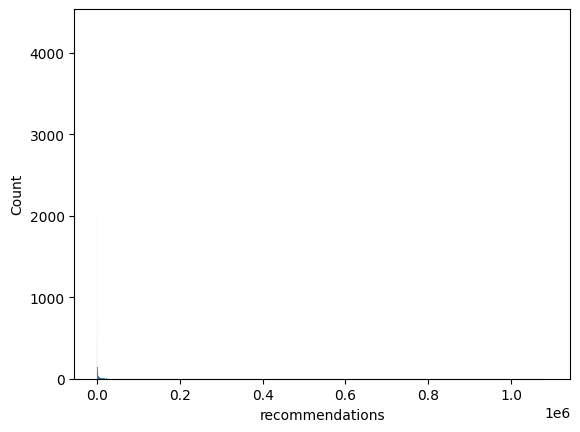

In [30]:
sns.histplot(steam_2['recommendations'])

<Axes: ylabel='log_recommendations'>

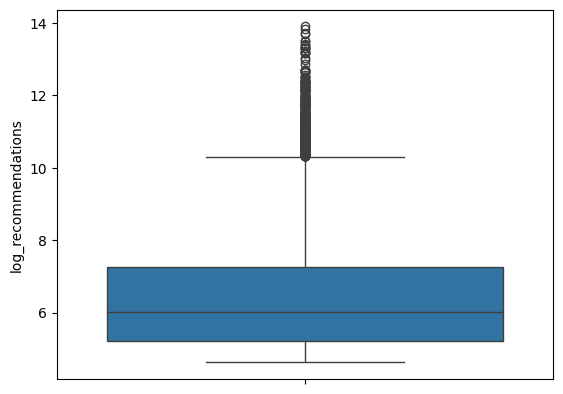

In [31]:
# take the log of recommendation and put them in a new column
steam_2['log_recommendations'] = np.log1p(steam_2['recommendations'])
sns. boxplot(steam_2['log_recommendations'])

<Axes: xlabel='log_recommendations', ylabel='Count'>

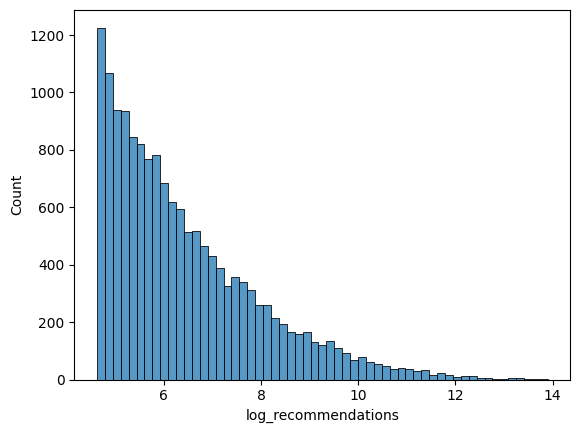

In [32]:
sns.histplot(steam_2['log_recommendations'])

In [33]:
steam_2['log_recommendations'].describe()

count   15546.00
mean        6.44
std         1.55
min         4.62
25%         5.23
50%         6.02
75%         7.26
max        13.90
Name: log_recommendations, dtype: float64

In [34]:
# divide our columns into numeric and categoric for analysis purpose
num = ['recommendations', 'log_recommendations', 'price', 'dlc_count', 'required_age', 'metacritic_score', 'achievements', 
       'positive', 'negative', 'average_playtime_forever', 'average_playtime_2weeks', 'median_playtime_forever', 'median_playtime_2weeks', 
       'peak_ccu', 'pct_pos_total', 'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent']

cat = ['windows', 'mac', 'linux', 'developers', 'publishers', 'categories', 'genres', 'estimated_owners']


In [35]:
# Pairplot 
# sns.pairplot(steam_2[num])

<Axes: >

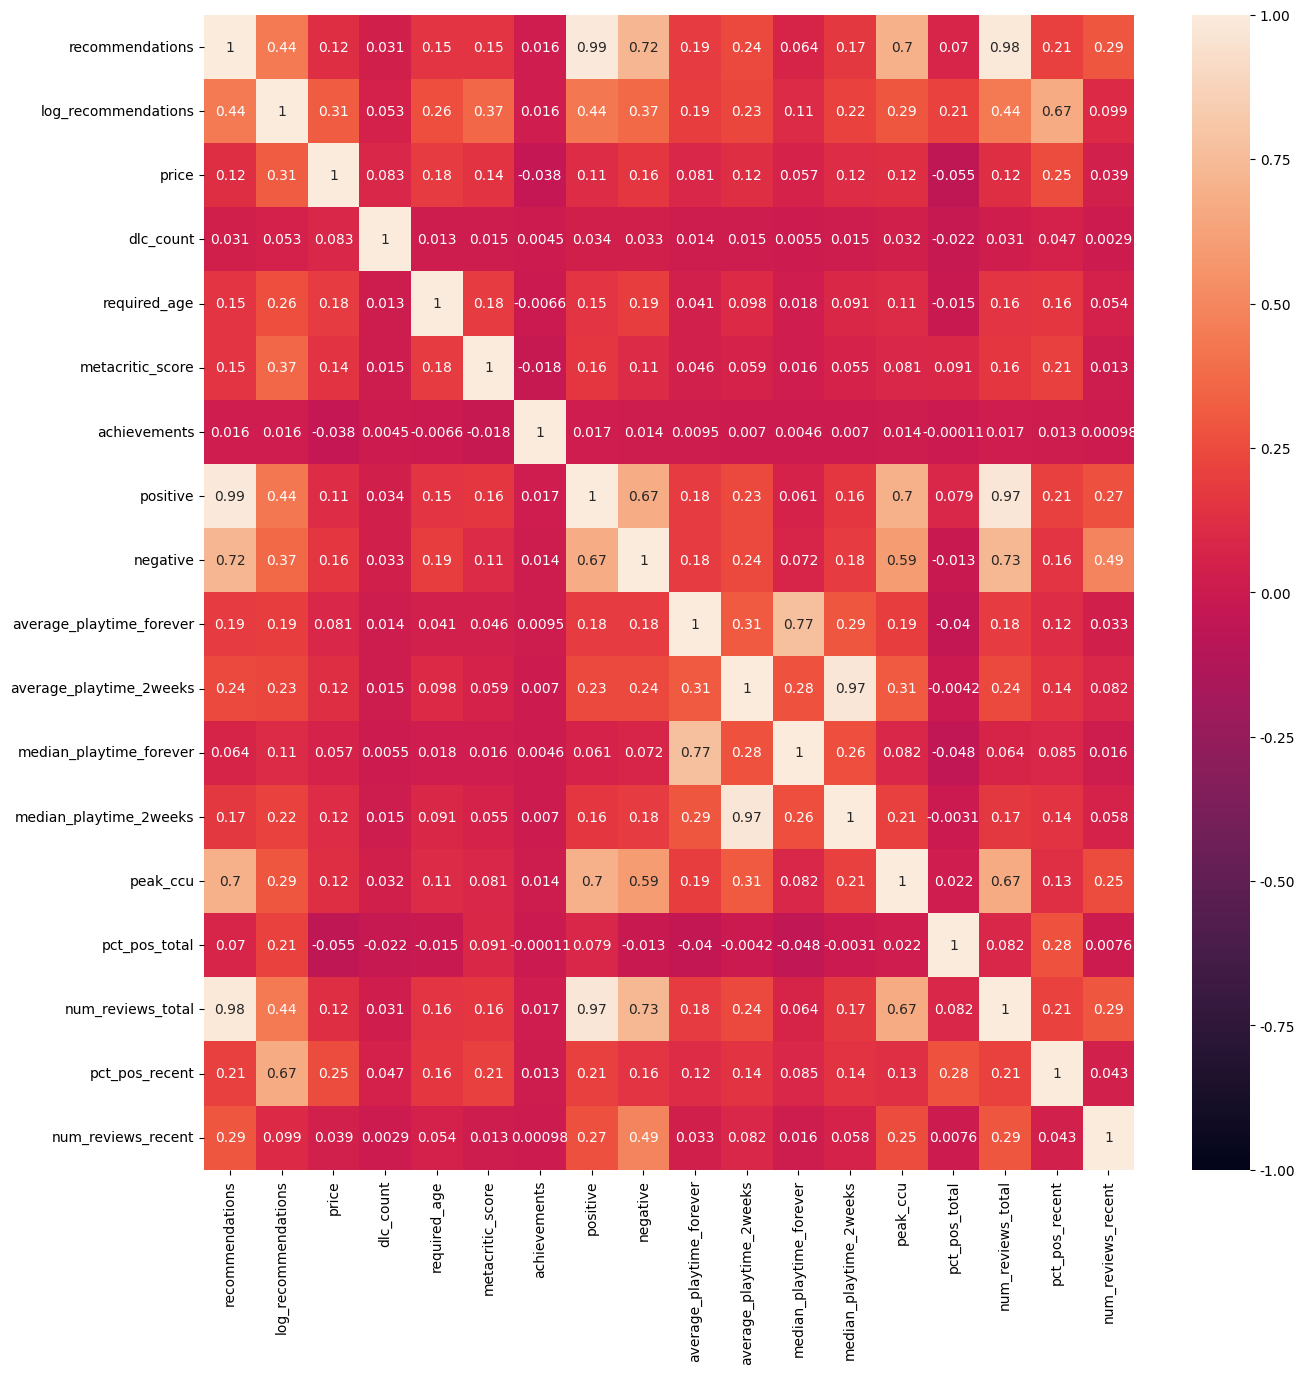

In [36]:
# correlation
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 15))
sns.heatmap(steam_2[num].corr(), annot=True, vmin=-1, vmax=1)


In [37]:
# change estimate_owners to ordered categorical variable for better analysis
cat_type = pd.CategoricalDtype(categories=['0 - 0', '0 - 20000', '20000 - 50000', '50000 - 100000', '100000 - 200000', '200000 - 500000', 
                                           '500000 - 1000000', '1000000 - 2000000', '2000000 - 5000000', '5000000 - 10000000'], ordered=True)

steam_2['estimated_owners'] = steam_2['estimated_owners'].astype(cat_type)


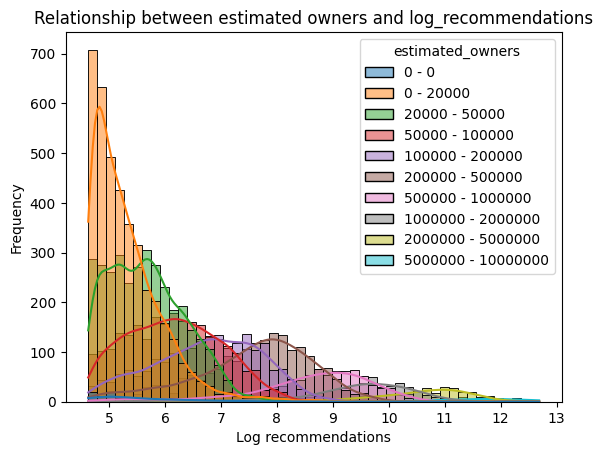

In [38]:
sns.histplot(hue='estimated_owners', x='log_recommendations', data=steam_2, color='lightblue', kde=True)
plt.title('Relationship between estimated owners and log_recommendations')
plt.xlabel('Log recommendations')
plt.ylabel('Frequency')
plt.show()


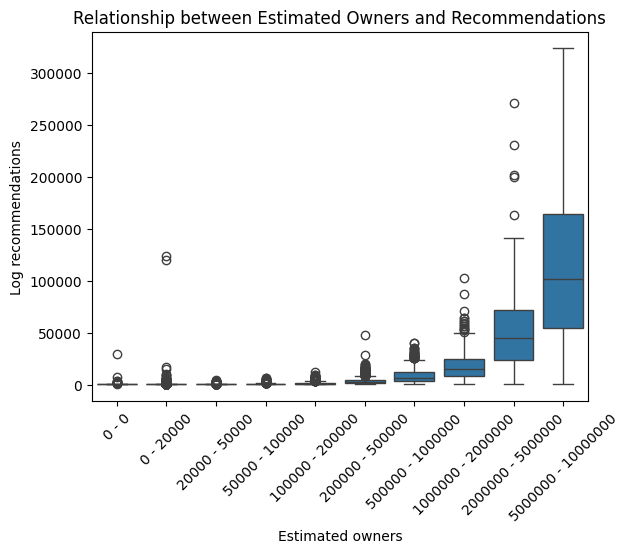

In [39]:
steam_2['estimated_owners'] = steam_2['estimated_owners'].astype(cat_type)
sns.boxplot(x='estimated_owners', y='recommendations', data=steam_2)
plt.title('Relationship between Estimated Owners and Recommendations')
plt.xlabel('Estimated owners')
plt.ylabel('Log recommendations')
plt.xticks(rotation=45)
plt.show()


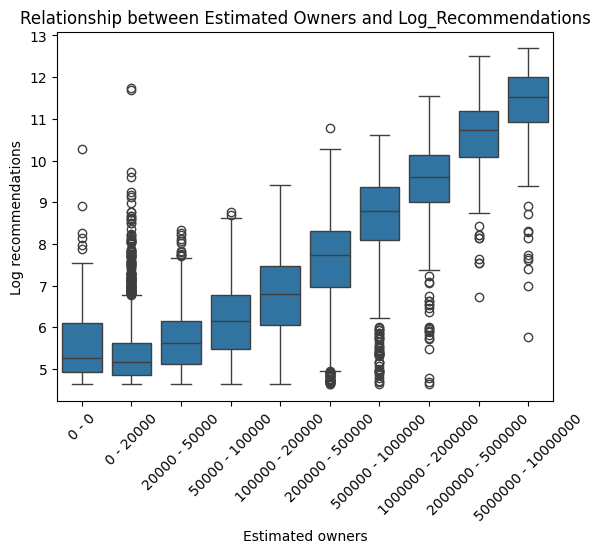

In [40]:
steam_2['estimated_owners'] = steam_2['estimated_owners'].astype(cat_type)
sns.boxplot(x='estimated_owners', y='log_recommendations', data=steam_2)
plt.title('Relationship between Estimated Owners and Log_Recommendations')
plt.xlabel('Estimated owners')
plt.ylabel('Log recommendations')
plt.xticks(rotation=45)
plt.show()


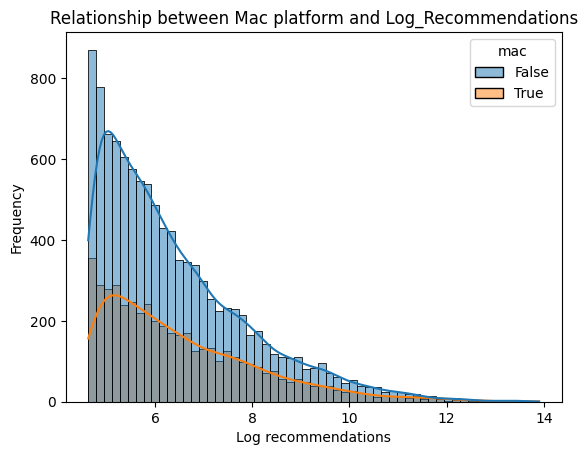

In [41]:
sns.histplot(hue='mac', x='log_recommendations', data=steam_2, color='lightblue', kde=True)
plt.title('Relationship between Mac platform and Log_Recommendations')
plt.xlabel('Log recommendations')
plt.ylabel('Frequency')
plt.show()


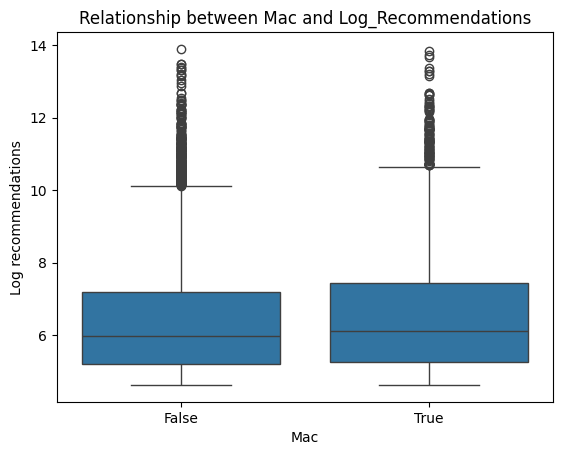

In [42]:
# looks like mac platform has no influence for the # of recommendations
sns.boxplot(x='mac', y='log_recommendations', data=steam_2)
plt.title('Relationship between Mac and Log_Recommendations')
plt.xlabel('Mac')
plt.ylabel('Log recommendations')
plt.show()


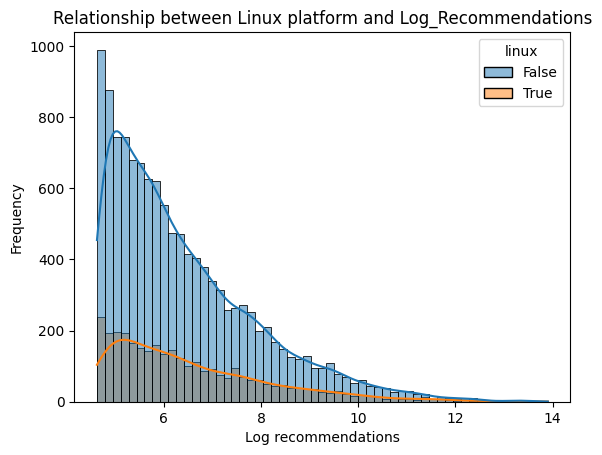

In [43]:
sns.histplot(hue='linux', x='log_recommendations', data=steam_2, color='lightblue', kde=True)
plt.title('Relationship between Linux platform and Log_Recommendations')
plt.xlabel('Log recommendations')
plt.ylabel('Frequency')
plt.show()

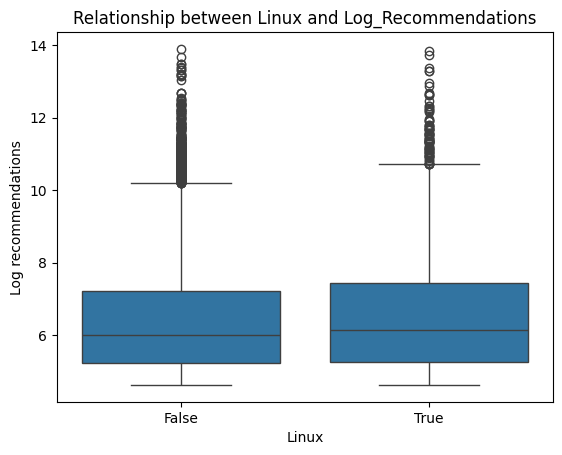

In [44]:
# looks like linux platform has no influence for the # of recommendations
sns.boxplot(x='linux', y='log_recommendations', data=steam_2)
plt.title('Relationship between Linux and Log_Recommendations')
plt.xlabel('Linux')
plt.ylabel('Log recommendations')
plt.show()

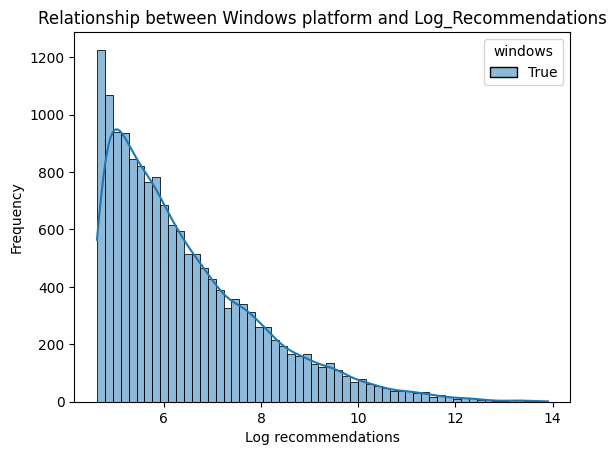

In [45]:
sns.histplot(hue='windows', x='log_recommendations', data=steam_2, color='lightblue', kde=True)
plt.title('Relationship between Windows platform and Log_Recommendations')
plt.xlabel('Log recommendations')
plt.ylabel('Frequency')
plt.show()

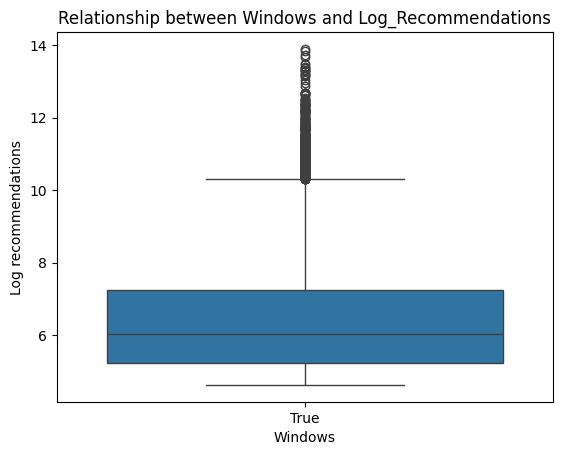

In [46]:
# It seems like all the games with recommendations > 0 supports windows platform
sns.boxplot(x='windows', y='log_recommendations', data=steam_2)
plt.title('Relationship between Windows and Log_Recommendations')
plt.xlabel('Windows')
plt.ylabel('Log recommendations')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

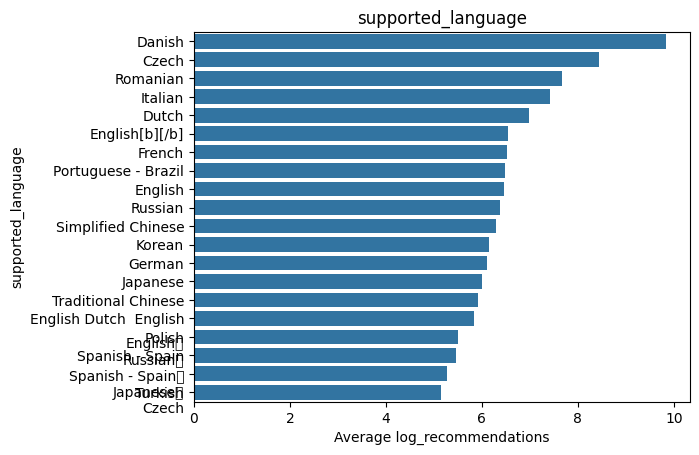

In [47]:
steam_2['supported_languages'] = steam_2['supported_languages'].apply(lambda x: "['Unknown']" if x == '[]' or x == "['-']" else x)
steam_2['supported_languages'] = steam_2['supported_languages'].apply(ast.literal_eval)
steam_2['supported_language'] = [sublist[0] for sublist in steam_2['supported_languages']]

avg_recs = steam_2.groupby('supported_language')['log_recommendations'].mean().reset_index()

top_20_devs = avg_recs.nlargest(20, 'log_recommendations')
plt.rcParams['font.sans-serif'] = ['SimHei']
sns.barplot(x='log_recommendations', y='supported_language', data=top_20_devs)
plt.title('supported_language')
plt.xlabel('Average log_recommendations')
plt.ylabel('supported_language')
plt.show()

# ValueError: malformed node or string: ['English', 'Russian', 'French', 'Italian', 'German', 'Polish', 'Ukrainian', 'Swedish', 'Simplified Chinese', 'Bulgarian', 'Danish', 'Finnish', 'Czech']


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

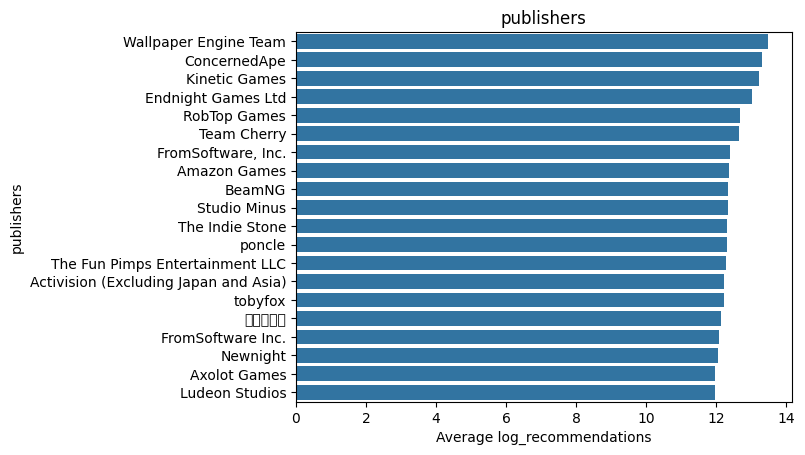

In [48]:
steam_2['publishers'] = steam_2['publishers'].apply(lambda x: "['Unknown']" if x == '[]' or x == "['-']" else x)
steam_2['publishers'] = steam_2['publishers'].apply(ast.literal_eval)
steam_2['first_publisher'] = [sublist[0] for sublist in steam_2['publishers']]

avg_recs = steam_2.groupby('first_publisher')['log_recommendations'].mean().reset_index()

top_20_devs = avg_recs.nlargest(20, 'log_recommendations')
plt.rcParams['font.sans-serif'] = ['SimHei']
sns.barplot(x='log_recommendations', y='first_publisher', data=top_20_devs)
plt.title('publishers')
plt.xlabel('Average log_recommendations')
plt.ylabel('publishers')
plt.show()

# ValueError: malformed node or string: ['EYEFRONT']

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

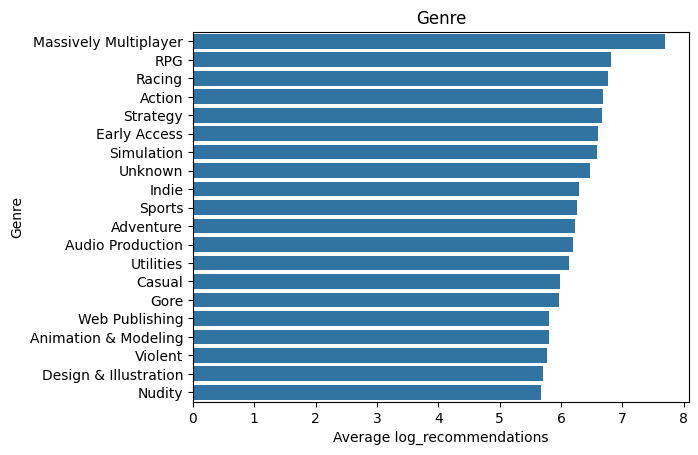

In [49]:
steam_2['genres'] = steam_2['genres'].apply(lambda x: "['Unknown']" if x == '[]' else x)
steam_2['genres'] = steam_2['genres'].apply(ast.literal_eval)
steam_2['first_genre'] = [sublist[0] for sublist in steam_2['genres']]

avg_recs = steam_2.groupby('first_genre')['log_recommendations'].mean().reset_index()

top_20_devs = avg_recs.nlargest(20, 'log_recommendations')
sns.barplot(x='log_recommendations', y='first_genre', data=top_20_devs)
plt.title('Genre')
plt.xlabel('Average log_recommendations')
plt.ylabel('Genre')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

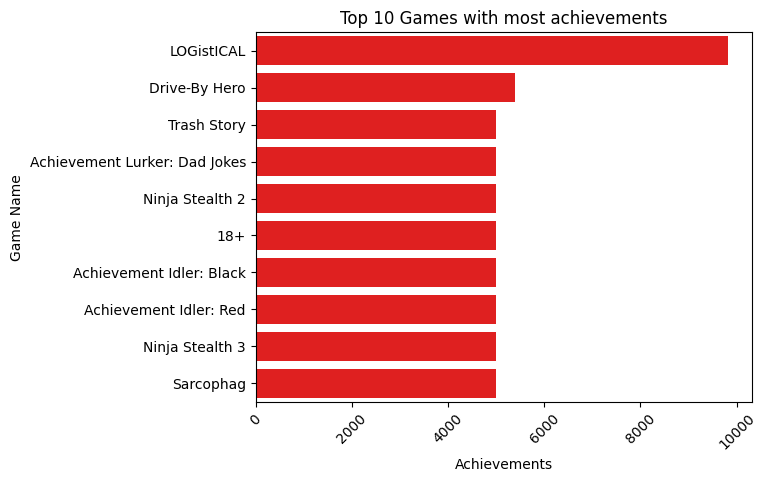

In [50]:
sns.barplot(y='name', x='achievements', data=steam_2.sort_values('achievements', ascending=False).head(10), color='red')
plt.title('Top 10 Games with most achievements')
plt.ylabel('Game Name')
plt.xlabel('Achievements')
plt.xticks(rotation=45)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

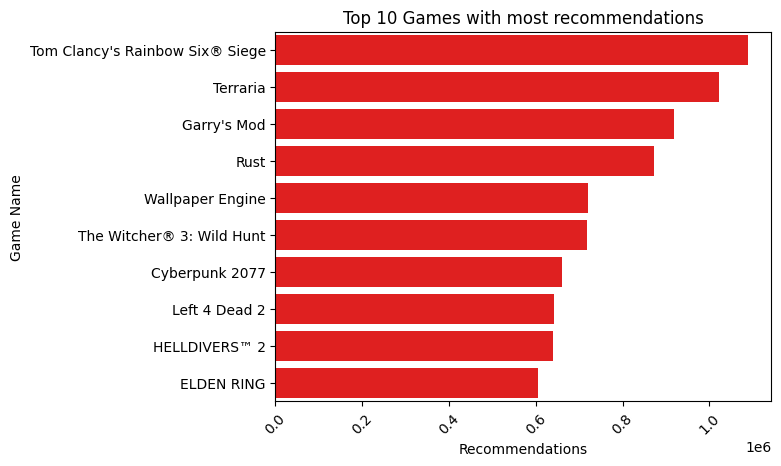

In [51]:
sns.barplot(y='name', x='recommendations', data=steam_2.sort_values('recommendations', ascending=False).head(10), color='red')
plt.title('Top 10 Games with most recommendations')
plt.ylabel('Game Name')
plt.xlabel('Recommendations')
plt.xticks(rotation=45)
plt.show()

In [52]:
steam_2['recommendations'].describe()

count     15546.00
mean       4634.00
std       29757.73
min         101.00
25%         185.00
50%         411.00
75%        1417.75
max     1088708.00
Name: recommendations, dtype: float64

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

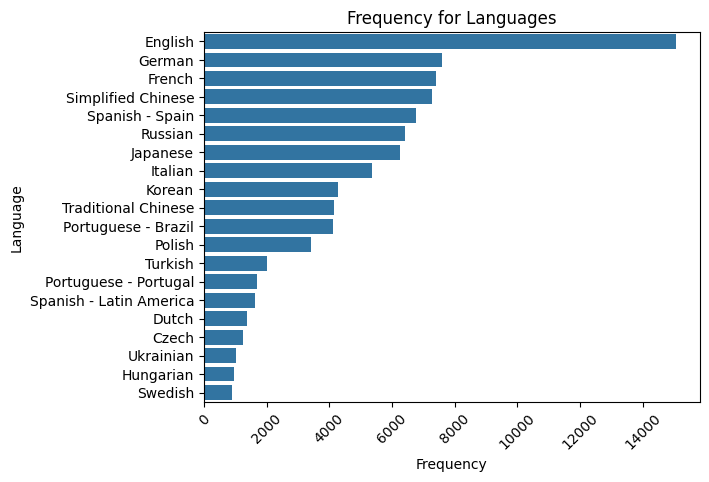

In [53]:
all_developers = [developer for sublist in steam_2['supported_languages'] for developer in sublist]

# Calculate the frequency of developers
developer_frequency=pd.Series(all_developers).value_counts().reset_index()
developer_frequency.columns=['Developer', 'Frequency']
sns.barplot(y='Developer', x='Frequency', data=developer_frequency.iloc[:20])
plt.title('Frequency for Languages')
plt.ylabel('Language')
plt.xlabel('Frequency')
plt.xticks(rotation=45)
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

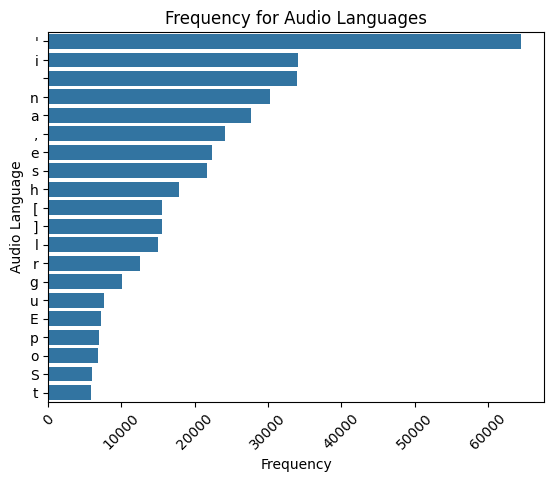

In [54]:
all_developers = [developer for sublist in steam_2['full_audio_languages'] for developer in sublist]

# Calculate the frequency of developers
developer_frequency=pd.Series(all_developers).value_counts().reset_index()
developer_frequency.columns=['Developer', 'Frequency']
sns.barplot(y='Developer', x='Frequency', data=developer_frequency.iloc[:20])
plt.title('Frequency for Audio Languages')
plt.ylabel('Audio Language')
plt.xlabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Step 5: Prepare data for building model

In [55]:
# Create the new dataframe steam_model with AppID as unique identifier
steam_model = pd.DataFrame(steam_2['AppID'])

In [56]:
# Extract year from release_date
steam_2['release_year'] = pd.to_datetime(steam_2['release_date']).dt.year

# Calculate the median year
median_year = steam_2['release_year'].median()

# Normalize the release year
steam_2['year_normalized'] = steam_2['release_year'] - median_year

# AppID and normalized year
steam_model['year_normalized'] = steam_2['year_normalized']

In [57]:
median_year

2019.0

In [58]:
steam_model.head(5)

,AppID,year_normalized
9164,866510,-1.00
12766,303720,-3.00
7523,614910,-2.00
14043,508290,-3.00
2430,1473350,4.00


In [59]:
steam_2.head(5)

,AppID,name,release_date,required_age,price,dlc_count,windows,mac,linux,metacritic_score,achievements,recommendations,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,supported_languages_count,full_audio_languages_count,target,log_recommendations,supported_language,first_publisher,first_genre,release_year,year_normalized
9164,866510,!AnyWay!,2018-06-06,0,1.99,39,True,False,False,0,4997,475,"[English, Russian, French, Italian, German, Po...",[],"[{'title': 'Buy !AnyWay!', 'description': '', ...",['EYEFRONT'],[EYEFRONT],"['Single-player', 'Multi-player', 'Steam Achie...","[Adventure, Casual, Indie]",392,181,100000 - 200000,0,0,0,0,8,70,474,-1,-1,152,2,1,6.17,English,EYEFRONT,Adventure,2018,-1.00
12766,303720,#KILLALLZOMBIES,2016-08-10,0,9.99,0,True,False,False,0,10,250,[English],['English'],"[{'title': 'Buy #KILLALLZOMBIES', 'description...",['Beatshapers'],"[Beatshapers, Fortell Games]","['Single-player', 'Multi-player', 'Co-op', 'Sh...","[Action, Indie]",239,63,0 - 20000,289,0,423,0,0,80,250,-1,-1,11,11,1,5.53,English,Beatshapers,Action,2016,-3.00
7523,614910,#monstercakes,2017-05-05,0,0.99,1,True,False,True,0,118,686,"[English, French, Italian, German, Spanish - S...",[],"[{'title': 'Buy #monstercakes', 'description':...",['Paleno Games'],[Paleno Games],"['Single-player', 'Steam Achievements', 'Steam...","[Casual, Indie]",741,101,100000 - 200000,138,0,138,0,84,87,687,-1,-1,72,2,1,6.53,English,Paleno Games,Casual,2017,-2.00
14043,508290,$1 Ride,2016-07-28,0,1.99,0,True,False,False,0,0,204,[English],[],"[{'title': 'Buy $1 Ride', 'description': '', '...",['BeHappy Studios'],[Back To Basics Gaming],"['Single-player', 'Steam Trading Cards', 'Fami...","[Action, Casual, Indie]",446,477,500000 - 1000000,206,0,204,0,1,68,204,-1,-1,11,2,1,5.32,English,Back To Basics Gaming,Action,2016,-3.00
2430,1473350,(the) Gnorp Apologue,2023-12-14,0,6.99,0,True,False,False,0,17,4492,[English],[],"[{'title': 'Buy (the) Gnorp Apologue', 'descri...",['Myco'],[(Myco)],"['Single-player', 'Steam Achievements', 'Steam...","[Casual, Indie, Simulation, Strategy]",4493,153,200000 - 500000,1089,0,1197,0,261,96,4524,97,200,11,2,1,8.41,English,(Myco),Casual,2023,4.00


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

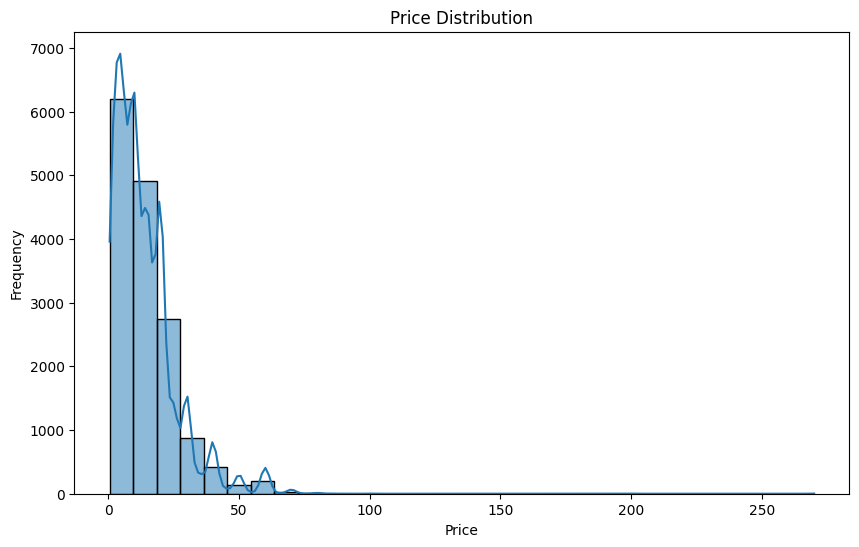

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(steam_2['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [61]:
steam_2['price'].describe()

count   15546.00
mean       13.73
std        11.97
min         0.49
25%         4.99
50%         9.99
75%        19.99
max       269.99
Name: price, dtype: float64

In [62]:
# Define a function to categorize prices
def categorize_price(price):
    if price <= 4.99:
        return 'cheap_less_then_5'
    elif 4.99 < price <= 9.99:
        return 'cheap_4.99_9.99'
    elif 9.99 < price <= 19.99:
        return 'high_9.99_19.99'
    else:
        return 'expensive_19.99_above'

# Apply the function to create a new column in steam_2
steam_2['price_category'] = steam_2['price'].apply(categorize_price)

# Perform one hot encoding on the price_category column
price_dummies = pd.get_dummies(steam_2['price_category'], prefix='price', drop_first=False)

# Create steam_model DataFrame with AppID and one hot encoded price categories
steam_model = steam_2[['AppID']].copy()
steam_model = pd.concat([steam_model, price_dummies], axis=1)

In [63]:
steam_model.head(5)

,AppID,price_cheap_4.99_9.99,price_cheap_less_then_5,price_expensive_19.99_above,price_high_9.99_19.99
9164,866510,False,True,False,False
12766,303720,True,False,False,False
7523,614910,False,True,False,False
14043,508290,False,True,False,False
2430,1473350,True,False,False,False


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

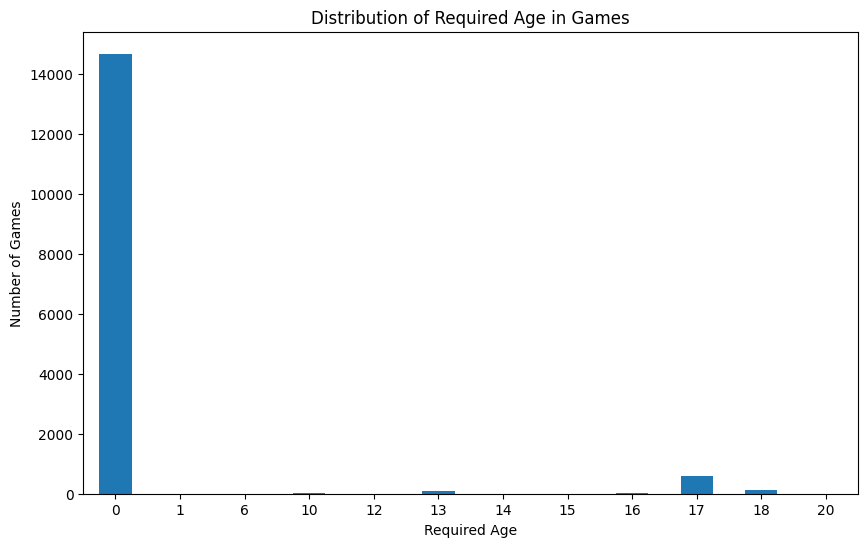

required_age
0     14676
1         1
6         3
10       13
12        6
13      104
14        1
15        3
16       31
17      578
18      129
20        1
Name: count, dtype: int64


In [64]:
# Check the distribution of each age in 'required_age' column
age_distribution = steam_2['required_age'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar')
plt.xlabel('Required Age')
plt.ylabel('Number of Games')
plt.title('Distribution of Required Age in Games')
plt.xticks(rotation=0)
plt.show()

# Print the distribution
print(age_distribution)

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Assuming steam_2 DataFrame is already defined
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'required_age' column
steam_2['required_age_scaled'] = scaler.fit_transform(steam_2[['required_age']])

# Create the steam_model DataFrame with AppID and scaled required_age
steam_model['required_age_scaled'] = steam_2['required_age_scaled']

In [66]:
steam_model.head(5)

,AppID,price_cheap_4.99_9.99,price_cheap_less_then_5,price_expensive_19.99_above,price_high_9.99_19.99,required_age_scaled
9164,866510,False,True,False,False,0.00
12766,303720,True,False,False,False,0.00
7523,614910,False,True,False,False,0.00
14043,508290,False,True,False,False,0.00
2430,1473350,True,False,False,False,0.00


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

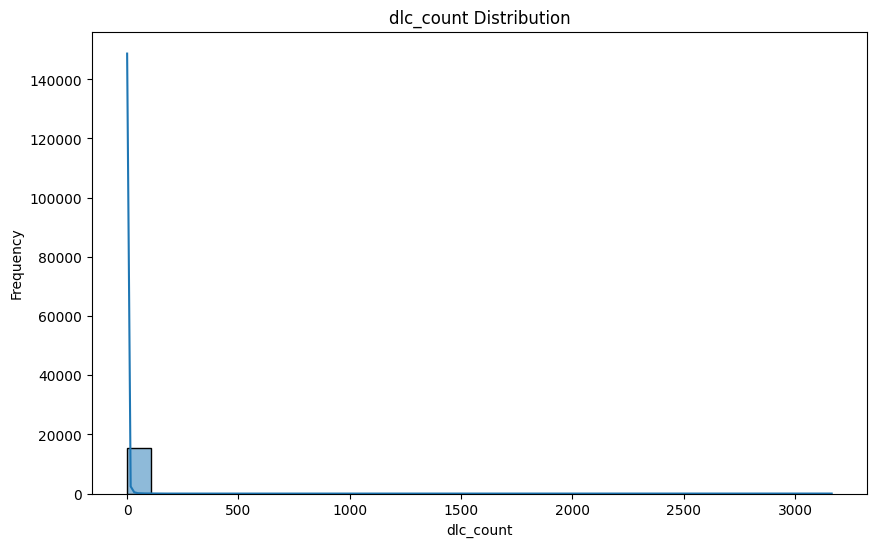

In [67]:
# dlc_count Distribution 
plt.figure(figsize=(10, 6))
sns.histplot(steam_2['dlc_count'], bins=30, kde=True)
plt.title('dlc_count Distribution')
plt.xlabel('dlc_count')
plt.ylabel('Frequency')
plt.show()

In [68]:
# take the log of log_dlc_count and put them in a new column
steam_2['log_dlc_count'] = np.log1p(steam_2['dlc_count'])

In [69]:
steam_2['log_dlc_count'].describe()

count   15546.00
mean        0.44
std         0.70
min         0.00
25%         0.00
50%         0.00
75%         0.69
max         8.06
Name: log_dlc_count, dtype: float64

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

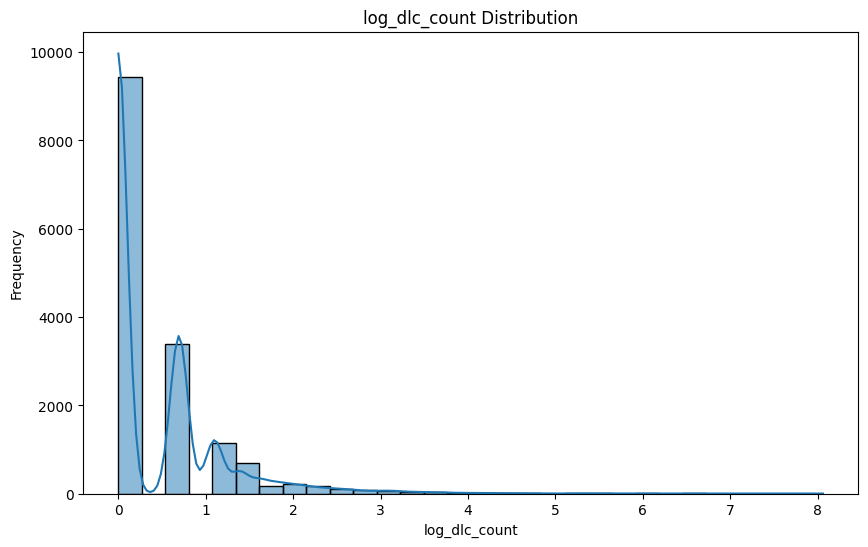

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(steam_2['log_dlc_count'], bins=30, kde=True)
plt.title('log_dlc_count Distribution')
plt.xlabel('log_dlc_count')
plt.ylabel('Frequency')
plt.show()

In [71]:
steam_model['log_dlc_count'] = steam_2['log_dlc_count']

In [72]:
steam_model.head(5)

,AppID,price_cheap_4.99_9.99,price_cheap_less_then_5,price_expensive_19.99_above,price_high_9.99_19.99,required_age_scaled,log_dlc_count
9164,866510,False,True,False,False,0.00,3.69
12766,303720,True,False,False,False,0.00,0.00
7523,614910,False,True,False,False,0.00,0.69
14043,508290,False,True,False,False,0.00,0.00
2430,1473350,True,False,False,False,0.00,0.00


In [73]:
steam_model[['windows', 'mac', 'linux']] = steam_2[['windows', 'mac', 'linux']]


In [74]:
steam_model.head(5)

,AppID,price_cheap_4.99_9.99,price_cheap_less_then_5,price_expensive_19.99_above,price_high_9.99_19.99,required_age_scaled,log_dlc_count,windows,mac,linux
9164,866510,False,True,False,False,0.00,3.69,True,False,False
12766,303720,True,False,False,False,0.00,0.00,True,False,False
7523,614910,False,True,False,False,0.00,0.69,True,False,True
14043,508290,False,True,False,False,0.00,0.00,True,False,False
2430,1473350,True,False,False,False,0.00,0.00,True,False,False


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

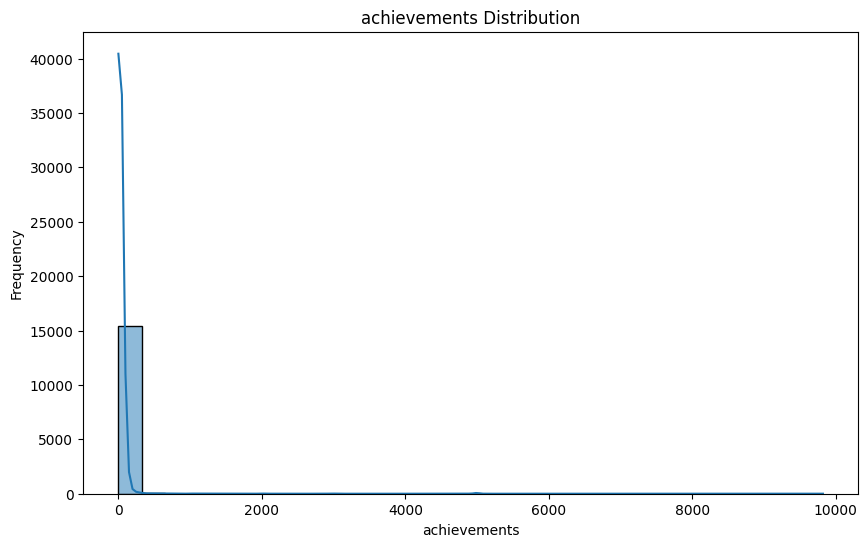

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(steam_2['achievements'], bins=30, kde=True)
plt.title('achievements Distribution')
plt.xlabel('achievements')
plt.ylabel('Frequency')
plt.show()

In [76]:
# take the log of log_achievements and put them in a new column
steam_2['log_achievements'] = np.log1p(steam_2['achievements'])

In [77]:
steam_2['log_achievements'].describe()

count   15546.00
mean        2.56
std         1.62
min         0.00
25%         1.39
50%         3.04
75%         3.69
max         9.19
Name: log_achievements, dtype: float64

In [78]:
steam_model['log_achievements'] = steam_2['log_achievements']

In [79]:
steam_model.head(5)

,AppID,price_cheap_4.99_9.99,price_cheap_less_then_5,price_expensive_19.99_above,price_high_9.99_19.99,required_age_scaled,log_dlc_count,windows,mac,linux,log_achievements
9164,866510,False,True,False,False,0.00,3.69,True,False,False,8.52
12766,303720,True,False,False,False,0.00,0.00,True,False,False,2.40
7523,614910,False,True,False,False,0.00,0.69,True,False,True,4.78
14043,508290,False,True,False,False,0.00,0.00,True,False,False,0.00
2430,1473350,True,False,False,False,0.00,0.00,True,False,False,2.89


In [80]:
steam_model['log_recommendations'] = steam_2['log_recommendations']

In [81]:
steam_2['log_recommendations'].describe()

count   15546.00
mean        6.44
std         1.55
min         4.62
25%         5.23
50%         6.02
75%         7.26
max        13.90
Name: log_recommendations, dtype: float64

In [82]:
# Define the threshold for binary classification: 50% - 6.02
threshold = 6.02

# Apply the lambda function to create the binary_output column
steam_model['binary_output'] = steam_model['log_recommendations'].apply(lambda x: 1 if x >= threshold else 0)


In [83]:
steam_model.head()

,AppID,price_cheap_4.99_9.99,price_cheap_less_then_5,price_expensive_19.99_above,price_high_9.99_19.99,required_age_scaled,log_dlc_count,windows,mac,linux,log_achievements,log_recommendations,binary_output
9164,866510,False,True,False,False,0.00,3.69,True,False,False,8.52,6.17,1
12766,303720,True,False,False,False,0.00,0.00,True,False,False,2.40,5.53,0
7523,614910,False,True,False,False,0.00,0.69,True,False,True,4.78,6.53,1
14043,508290,False,True,False,False,0.00,0.00,True,False,False,0.00,5.32,0
2430,1473350,True,False,False,False,0.00,0.00,True,False,False,2.89,8.41,1


In [84]:
steam_2.head (5)

,AppID,name,release_date,required_age,price,dlc_count,windows,mac,linux,metacritic_score,achievements,recommendations,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,supported_languages_count,full_audio_languages_count,target,log_recommendations,supported_language,first_publisher,first_genre,release_year,year_normalized,price_category,required_age_scaled,log_dlc_count,log_achievements
9164,866510,!AnyWay!,2018-06-06,0,1.99,39,True,False,False,0,4997,475,"[English, Russian, French, Italian, German, Po...",[],"[{'title': 'Buy !AnyWay!', 'description': '', ...",['EYEFRONT'],[EYEFRONT],"['Single-player', 'Multi-player', 'Steam Achie...","[Adventure, Casual, Indie]",392,181,100000 - 200000,0,0,0,0,8,70,474,-1,-1,152,2,1,6.17,English,EYEFRONT,Adventure,2018,-1.00,cheap_less_then_5,0.00,3.69,8.52
12766,303720,#KILLALLZOMBIES,2016-08-10,0,9.99,0,True,False,False,0,10,250,[English],['English'],"[{'title': 'Buy #KILLALLZOMBIES', 'description...",['Beatshapers'],"[Beatshapers, Fortell Games]","['Single-player', 'Multi-player', 'Co-op', 'Sh...","[Action, Indie]",239,63,0 - 20000,289,0,423,0,0,80,250,-1,-1,11,11,1,5.53,English,Beatshapers,Action,2016,-3.00,cheap_4.99_9.99,0.00,0.00,2.40
7523,614910,#monstercakes,2017-05-05,0,0.99,1,True,False,True,0,118,686,"[English, French, Italian, German, Spanish - S...",[],"[{'title': 'Buy #monstercakes', 'description':...",['Paleno Games'],[Paleno Games],"['Single-player', 'Steam Achievements', 'Steam...","[Casual, Indie]",741,101,100000 - 200000,138,0,138,0,84,87,687,-1,-1,72,2,1,6.53,English,Paleno Games,Casual,2017,-2.00,cheap_less_then_5,0.00,0.69,4.78
14043,508290,$1 Ride,2016-07-28,0,1.99,0,True,False,False,0,0,204,[English],[],"[{'title': 'Buy $1 Ride', 'description': '', '...",['BeHappy Studios'],[Back To Basics Gaming],"['Single-player', 'Steam Trading Cards', 'Fami...","[Action, Casual, Indie]",446,477,500000 - 1000000,206,0,204,0,1,68,204,-1,-1,11,2,1,5.32,English,Back To Basics Gaming,Action,2016,-3.00,cheap_less_then_5,0.00,0.00,0.00
2430,1473350,(the) Gnorp Apologue,2023-12-14,0,6.99,0,True,False,False,0,17,4492,[English],[],"[{'title': 'Buy (the) Gnorp Apologue', 'descri...",['Myco'],[(Myco)],"['Single-player', 'Steam Achievements', 'Steam...","[Casual, Indie, Simulation, Strategy]",4493,153,200000 - 500000,1089,0,1197,0,261,96,4524,97,200,11,2,1,8.41,English,(Myco),Casual,2023,4.00,cheap_4.99_9.99,0.00,0.00,2.89


In [85]:
# categories one-hot encoding
from collections import Counter

all_categories = steam_2['categories'].str.split(',').explode()
counter = Counter(all_categories)
top_20_categories = counter.most_common(20)
for category, count in top_20_categories:
    print(f'{category}: {count}')

 'Family Sharing']: 15224
['Single-player': 15032
 'Steam Achievements': 10883
 'Steam Cloud': 7848
 'Steam Trading Cards': 6253
 'Full controller support': 5123
 'Multi-player': 3632
 'Partial Controller Support': 2470
 'Co-op': 2285
 'PvP': 2031
 'Steam Leaderboards': 1817
 'Online PvP': 1646
 'Remote Play Together': 1594
 'Online Co-op': 1464
 'Shared/Split Screen': 1318
 'Remote Play on TV': 1274
 'Steam Workshop': 1044
 'Stats': 898
 'Shared/Split Screen PvP': 850
 'Shared/Split Screen Co-op': 802


In [86]:
# if the game isnt included in top 20 categories, will be dropped
# doing this only reduced 500 rows
all_categories = steam_2['categories'].str.split(',').explode()

counter = Counter(all_categories)

top_20_categories = [category for category, count in counter.most_common(20)]

# Perform one-hot encoding on the 'categories' column for the top 20 categories
one_hot_encoded = steam_2['categories'].str.get_dummies(sep=',')[top_20_categories]

# Add the one-hot encoded categories to steam_model
steam_model = pd.concat([steam_model, one_hot_encoded], axis=1)

In [87]:
# Perform one hot encoding on the 'categories' column for the top 20 categories
one_hot_encoded = steam_2['categories'].str.get_dummies(sep=',')[top_20_categories]

# Add the one hot encoded categories to steam_model
steam_model = pd.concat([steam_model, one_hot_encoded], axis=1)

In [88]:
steam_model.head (5)

,AppID,price_cheap_4.99_9.99,price_cheap_less_then_5,price_expensive_19.99_above,price_high_9.99_19.99,required_age_scaled,log_dlc_count,windows,mac,linux,log_achievements,log_recommendations,binary_output,'Family Sharing'],['Single-player','Steam Achievements','Steam Cloud','Steam Trading Cards','Full controller support','Multi-player','Partial Controller Support','Co-op','PvP','Steam Leaderboards','Online PvP','Remote Play Together','Online Co-op','Shared/Split Screen','Remote Play on TV','Steam Workshop','Stats','Shared/Split Screen PvP','Shared/Split Screen Co-op','Family Sharing'],['Single-player','Steam Achievements','Steam Cloud','Steam Trading Cards','Full controller support','Multi-player','Partial Controller Support','Co-op','PvP','Steam Leaderboards','Online PvP','Remote Play Together','Online Co-op','Shared/Split Screen','Remote Play on TV','Steam Workshop','Stats','Shared/Split Screen PvP','Shared/Split Screen Co-op'
9164,866510,False,True,False,False,0.00,3.69,True,False,False,8.52,6.17,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0
12766,303720,True,False,False,False,0.00,0.00,True,False,False,2.40,5.53,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1
7523,614910,False,True,False,False,0.00,0.69,True,False,True,4.78,6.53,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
14043,508290,False,True,False,False,0.00,0.00,True,False,False,0.00,5.32,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2430,1473350,True,False,False,False,0.00,0.00,True,False,False,2.89,8.41,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
def clean_column_name(col_name):
    return col_name.replace("‘", "").replace("’", "").replace("[", "").replace("]", "").replace("'", "")

# Rename all columns so that they do not contain special symbols
steam_model.rename(columns=lambda x: clean_column_name(x), inplace=True)


In [90]:
steam_model.head (5)

,AppID,price_cheap_4.99_9.99,price_cheap_less_then_5,price_expensive_19.99_above,price_high_9.99_19.99,required_age_scaled,log_dlc_count,windows,mac,linux,log_achievements,log_recommendations,binary_output,Family Sharing,Single-player,Steam Achievements,Steam Cloud,Steam Trading Cards,Full controller support,Multi-player,Partial Controller Support,Co-op,PvP,Steam Leaderboards,Online PvP,Remote Play Together,Online Co-op,Shared/Split Screen,Remote Play on TV,Steam Workshop,Stats,Shared/Split Screen PvP,Shared/Split Screen Co-op,Family Sharing,Single-player,Steam Achievements,Steam Cloud,Steam Trading Cards,Full controller support,Multi-player,Partial Controller Support,Co-op,PvP,Steam Leaderboards,Online PvP,Remote Play Together,Online Co-op,Shared/Split Screen,Remote Play on TV,Steam Workshop,Stats,Shared/Split Screen PvP,Shared/Split Screen Co-op
9164,866510,False,True,False,False,0.00,3.69,True,False,False,8.52,6.17,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0
12766,303720,True,False,False,False,0.00,0.00,True,False,False,2.40,5.53,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1
7523,614910,False,True,False,False,0.00,0.69,True,False,True,4.78,6.53,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
14043,508290,False,True,False,False,0.00,0.00,True,False,False,0.00,5.32,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2430,1473350,True,False,False,False,0.00,0.00,True,False,False,2.89,8.41,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
all_developers = steam_2['developers'].str.split(',').explode()
counter = Counter(all_developers)
all_developers = counter.most_common(40)
for category, count in all_developers:
    print(f'{category}: {count}')

 Inc.']: 133
 LTD.']: 107
 Ltd.']: 96
 LLC']: 86
['KOEI TECMO GAMES CO.: 70
['Square Enix']: 41
['Milestone S.r.l.']: 38
[]: 37
['Square Enix': 33
['CAPCOM Co.: 31
['Lovely Games']: 29
['Octo Games']: 26
['Quiet River']: 26
['Winged Cloud']: 26
['Nihon Falcom']: 26
Ltd']: 25
['HeR Interactive']: 25
["Chilla's Art"]: 23
['Daedalic Entertainment']: 22
['Choice of Games']: 22
['Kairosoft Co.: 21
['RewindApp']: 21
Ltd.']: 21
['Arc System Works']: 20
['Valve']: 20
['LucasArts']: 20
['Cyanide Studio']: 19
['Idea Factory': 19
['Ubisoft Montreal']: 19
['Humongous Entertainment']: 19
['Nippon Ichi Software: 18
['INTI CREATES CO.: 18
['Spike Chunsoft Co.: 17
 'Feral Interactive (Mac)': 17
['Rebellion']: 17
['EGAMER']: 17
['PopCap Games: 17
 'Feral Interactive (Linux)']: 16
['Romantic Room']: 16
['Pirates Of The Digital Sea']: 16


<Axes: ylabel='price'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

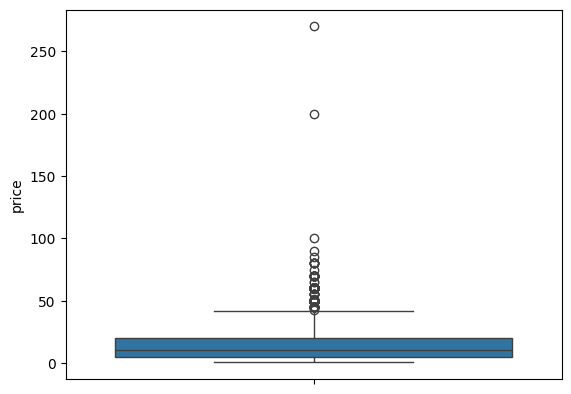

In [92]:
sns. boxplot(steam_2['price'])

In [93]:
# List of experienced developers
experienced_developers_list = [
    "KOEI TECMO GAMES CO", "Square Enix", "Milestone S.r.l.", "CAPCOM Co.",
    "Lovely Games", "Octo Games", "Quiet River", "Winged Cloud",
    "Nihon Falcom", "HeR Interactive", "Chilla's Art", "Daedalic Entertainment",
    "Choice of Games", "Kairosoft Co.", "RewindApp", "Arc System Works",
    "Valve", "LucasArts", "Cyanide Studio", "Idea Factory",
    "Ubisoft Montreal", "Humongous Entertainment", "Nippon Ichi Software",
    "INTI CREATES CO.", "Spike Chunsoft Co.", "Feral Interactive",
    "Rebellion", "EGAMER", "PopCap Games", "Romantic Room",
    "Pirates Of The Digital Sea"
]

# Function to check if any experienced developer is in the developers list
def is_experienced(developers):
    if pd.isna(developers):
        return 0
    for developer in experienced_developers_list:
        if developer in developers:
            return 1
    return 0

# Create the Experienced_developers column
steam_2['Experienced_developers'] = steam_2['developers'].apply(is_experienced)

# Add Experienced_developers to steam_model
steam_model['Experienced_developers'] = steam_2['Experienced_developers']

In [94]:
steam_model.head (5)

,AppID,price_cheap_4.99_9.99,price_cheap_less_then_5,price_expensive_19.99_above,price_high_9.99_19.99,required_age_scaled,log_dlc_count,windows,mac,linux,log_achievements,log_recommendations,binary_output,Family Sharing,Single-player,Steam Achievements,Steam Cloud,Steam Trading Cards,Full controller support,Multi-player,Partial Controller Support,Co-op,PvP,Steam Leaderboards,Online PvP,Remote Play Together,Online Co-op,Shared/Split Screen,Remote Play on TV,Steam Workshop,Stats,Shared/Split Screen PvP,Shared/Split Screen Co-op,Family Sharing,Single-player,Steam Achievements,Steam Cloud,Steam Trading Cards,Full controller support,Multi-player,Partial Controller Support,Co-op,PvP,Steam Leaderboards,Online PvP,Remote Play Together,Online Co-op,Shared/Split Screen,Remote Play on TV,Steam Workshop,Stats,Shared/Split Screen PvP,Shared/Split Screen Co-op,Experienced_developers
9164,866510,False,True,False,False,0.00,3.69,True,False,False,8.52,6.17,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
12766,303720,True,False,False,False,0.00,0.00,True,False,False,2.40,5.53,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,0
7523,614910,False,True,False,False,0.00,0.69,True,False,True,4.78,6.53,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
14043,508290,False,True,False,False,0.00,0.00,True,False,False,0.00,5.32,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2430,1473350,True,False,False,False,0.00,0.00,True,False,False,2.89,8.41,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
steam_2['Experienced_developers'].describe()


count   15546.00
mean        0.05
std         0.23
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: Experienced_developers, dtype: float64

In [96]:
count_zeros = (steam_2['Experienced_developers'] == 0).sum()
count_ones = (steam_2['Experienced_developers'] == 1).sum()
print(f"Number of 0s: {count_zeros}")
print(f"Number of 1s: {count_ones}")

Number of 0s: 14700
Number of 1s: 846


In [97]:
steam_2['supported_languages_count'].describe()


count   15546.00
mean       90.11
std       121.57
min         8.00
25%        11.00
50%        61.00
75%       129.00
max      1218.00
Name: supported_languages_count, dtype: float64

In [98]:
# Assuming steam_2 and steam_model are already defined
# Categorize supported_languages_count into four categories
conditions = [
    (steam_2['supported_languages_count'] <= 11.00),
    (steam_2['supported_languages_count'] > 11.00) & (steam_2['supported_languages_count'] <= 61.00),
    (steam_2['supported_languages_count'] > 61.00) & (steam_2['supported_languages_count'] <= 129.00),
    (steam_2['supported_languages_count'] > 129.00)
]

choices = ['supported_languages_low', 'supported_languages_median', 'supported_languages_high', 'supported_languages_very_high']

steam_2['supported_languages_category'] = np.select(conditions, choices, default='Unknown')

# Perform one-hot encoding on the new category
one_hot_encoded = pd.get_dummies(steam_2['supported_languages_category'], drop_first=True)

# Add the one-hot encoded features to steam_model
steam_model = pd.concat([steam_model, one_hot_encoded], axis=1)

In [99]:
pd.set_option('display.max_columns', None)


In [100]:
description = steam_model[['supported_languages_low', 'supported_languages_median', 'supported_languages_very_high']].describe()

print(description)

       supported_languages_low supported_languages_median  \
count                    15546                      15546   
unique                       2                          2   
top                      False                      False   
freq                     11297                      11808   

       supported_languages_very_high  
count                          15546  
unique                             2  
top                            False  
freq                           11678  


In [101]:
steam_model.head (5)

,AppID,price_cheap_4.99_9.99,price_cheap_less_then_5,price_expensive_19.99_above,price_high_9.99_19.99,required_age_scaled,log_dlc_count,windows,mac,linux,log_achievements,log_recommendations,binary_output,Family Sharing,Single-player,Steam Achievements,Steam Cloud,Steam Trading Cards,Full controller support,Multi-player,Partial Controller Support,Co-op,PvP,Steam Leaderboards,Online PvP,Remote Play Together,Online Co-op,Shared/Split Screen,Remote Play on TV,Steam Workshop,Stats,Shared/Split Screen PvP,Shared/Split Screen Co-op,Family Sharing,Single-player,Steam Achievements,Steam Cloud,Steam Trading Cards,Full controller support,Multi-player,Partial Controller Support,Co-op,PvP,Steam Leaderboards,Online PvP,Remote Play Together,Online Co-op,Shared/Split Screen,Remote Play on TV,Steam Workshop,Stats,Shared/Split Screen PvP,Shared/Split Screen Co-op,Experienced_developers,supported_languages_low,supported_languages_median,supported_languages_very_high
9164,866510,False,True,False,False,0.00,3.69,True,False,False,8.52,6.17,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,False,False,True
12766,303720,True,False,False,False,0.00,0.00,True,False,False,2.40,5.53,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,0,True,False,False
7523,614910,False,True,False,False,0.00,0.69,True,False,True,4.78,6.53,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,False,False,False
14043,508290,False,True,False,False,0.00,0.00,True,False,False,0.00,5.32,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False
2430,1473350,True,False,False,False,0.00,0.00,True,False,False,2.89,8.41,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False


# Step 6: Building model
# binary problem > we can use Logistic Regression, KNN and Naive Bayes to make predictions


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_recall_curve, precision_score, recall_score, accuracy_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [103]:

def remove_duplicate_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.loc[:,~df.columns.duplicated()]
    return df

# Assuming 'steam_model' is your DataFrame
steam_model = remove_duplicate_columns(steam_model)

In [104]:
steam_model.columns = steam_model.columns.str.replace(' ', '_')

In [105]:
# check for data balance
steam_model.groupby('binary_output').count()

,AppID,price_cheap_4.99_9.99,price_cheap_less_then_5,price_expensive_19.99_above,price_high_9.99_19.99,required_age_scaled,log_dlc_count,windows,mac,linux,log_achievements,log_recommendations,_Family_Sharing,Single-player,_Steam_Achievements,_Steam_Cloud,_Steam_Trading_Cards,_Full_controller_support,_Multi-player,_Partial_Controller_Support,_Co-op,_PvP,_Steam_Leaderboards,_Online_PvP,_Remote_Play_Together,_Online_Co-op,_Shared/Split_Screen,_Remote_Play_on_TV,_Steam_Workshop,_Stats,_Shared/Split_Screen_PvP,_Shared/Split_Screen_Co-op,Experienced_developers,supported_languages_low,supported_languages_median,supported_languages_very_high
binary_output,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771
1,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775,7775


In [106]:
steam_model['required_age_scaled'].max()

1.0

<Axes: xlabel='required_age_scaled', ylabel='Count'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

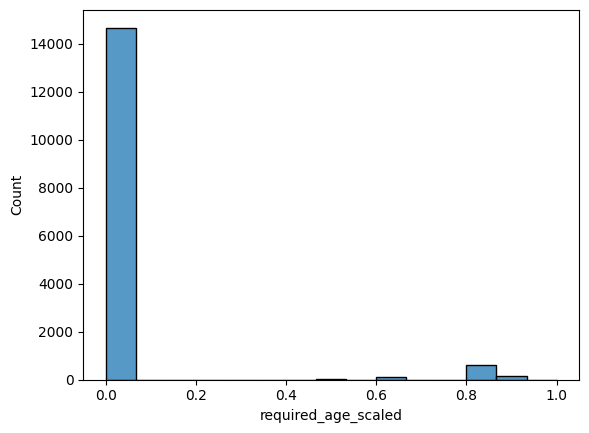

In [107]:
sns.histplot(x=steam_model['required_age_scaled'])

In [108]:
steam_model

,AppID,price_cheap_4.99_9.99,price_cheap_less_then_5,price_expensive_19.99_above,price_high_9.99_19.99,required_age_scaled,log_dlc_count,windows,mac,linux,log_achievements,log_recommendations,binary_output,_Family_Sharing,Single-player,_Steam_Achievements,_Steam_Cloud,_Steam_Trading_Cards,_Full_controller_support,_Multi-player,_Partial_Controller_Support,_Co-op,_PvP,_Steam_Leaderboards,_Online_PvP,_Remote_Play_Together,_Online_Co-op,_Shared/Split_Screen,_Remote_Play_on_TV,_Steam_Workshop,_Stats,_Shared/Split_Screen_PvP,_Shared/Split_Screen_Co-op,Experienced_developers,supported_languages_low,supported_languages_median,supported_languages_very_high
9164,866510,False,True,False,False,0.00,3.69,True,False,False,8.52,6.17,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,False,False,True
12766,303720,True,False,False,False,0.00,0.00,True,False,False,2.40,5.53,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,0,True,False,False
7523,614910,False,True,False,False,0.00,0.69,True,False,True,4.78,6.53,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,False,False,False
14043,508290,False,True,False,False,0.00,0.00,True,False,False,0.00,5.32,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False
2430,1473350,True,False,False,False,0.00,0.00,True,False,False,2.89,8.41,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5085,1210030,False,False,False,True,0.00,1.10,True,True,False,4.26,7.23,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False
13337,1600500,False,False,False,True,0.00,0.00,True,False,False,4.73,5.44,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False
16243,1966070,True,False,False,False,0.00,0.69,True,False,False,0.00,5.02,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,True,False
5653,1674890,False,True,False,False,0.00,1.39,True,False,False,3.22,7.05,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,True,False


In [109]:
X = steam_model [['price_cheap_4.99_9.99', 'price_expensive_19.99_above', 'price_expensive_19.99_above', 'required_age_scaled', 'log_dlc_count', 'log_achievements', 'Single-player',
    '_Multi-player', '_Online_PvP', '_Online_Co-op', 'Experienced_developers',
    'supported_languages_low', 'supported_languages_very_high'
]]
y = steam_model['binary_output']

In [110]:
X.describe()

,required_age_scaled,log_dlc_count,log_achievements,Single-player,_Multi-player,_Online_PvP,_Online_Co-op,Experienced_developers
count,15546.00,15546.00,15546.00,15546.00,15546.00,15546.00,15546.00,15546.00
mean,0.05,0.44,2.56,0.97,0.23,0.11,0.09,0.05
std,0.19,0.70,1.62,0.18,0.42,0.31,0.29,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,1.39,1.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,3.04,1.00,0.00,0.00,0.00,0.00
75%,0.00,0.69,3.69,1.00,0.00,0.00,0.00,0.00
max,1.00,8.06,9.19,1.00,1.00,1.00,1.00,1.00


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30)


In [112]:
# Setting up each model 
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()

In [113]:
# cross validation to see in general which model performs best for the problem
knn_scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5 )
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv=5 )
nb_scores = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv=5 )

In [114]:
# Check for the existence of a variable and print its value
try:
    print("KNN Scores:", knn_scores)
    print("Logistic Regression Scores:", logreg_scores)
    print("Naive Bayes Scores:", nb_scores)
except NameError as e:
    print("Error:", e)

# Calculate and print the mean
try:
    print("Mean KNN Score:", np.mean(knn_scores))
    print("Mean Logistic Regression Score:", np.mean(logreg_scores))
    print("Mean Naive Bayes Score:", np.mean(nb_scores))
except Exception as e:
    print("Error while calculating mean:", e)

KNN Scores: [0.58429031 0.61368856 0.61626838 0.60707721 0.60431985]
Logistic Regression Scores: [0.6458429  0.64905834 0.65946691 0.6484375  0.64889706]
Naive Bayes Scores: [0.62471291 0.61736334 0.62362132 0.63143382 0.60983456]
Mean KNN Score: 0.6051288622362129
Mean Logistic Regression Score: 0.6503405421654193
Mean Naive Bayes Score: 0.6213931915209814


In [115]:
# KNeighboursClassifier was then next used to evaluate the data
# high_value is a result of combining RFM altogether using weights, and the values are binary, making it apt for Classifier

train_A, test_A, train_B, test_B = train_test_split(X, y, test_size=0.3, random_state=1)

# Scale the data to normalize 

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_A, train_B)

KNeighborsClassifier(n_neighbors=2)

In [116]:
# Checking different performances of k

k_values = [i for i in range (1,50)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

# k-values and corresopnding scores have been now generated

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

The best k value is 32 with an accuracy score of 0.6471


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

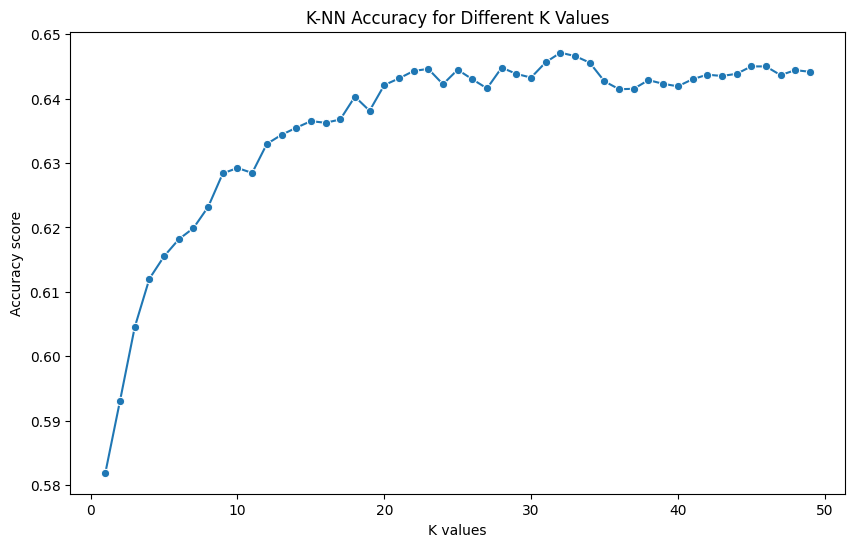

In [117]:
# Plot the k-values and corresponding scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K values")
plt.ylabel("Accuracy score")
plt.title("K-NN Accuracy for Different K Values")

# Find the best k value
best_k = k_values[np.argmax(scores)]
best_score = max(scores)

print(f"The best k value is {best_k} with an accuracy score of {best_score:.4f}")

plt.show()

 - After changing the k value, the accuracy of the model improved from 0.607 to 0.6471

Text(0, 0.5, 'Accuracy score')

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

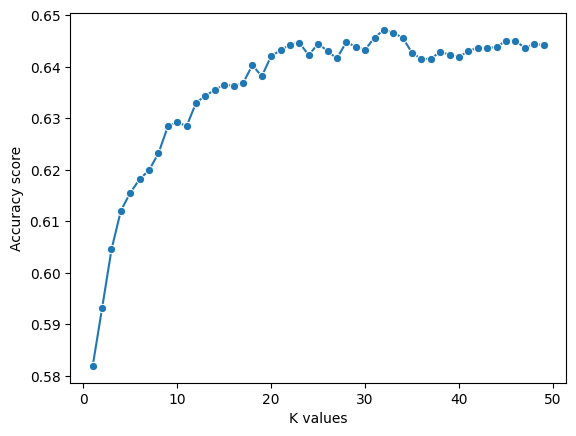

In [118]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K values")
plt.ylabel("Accuracy score")
# plot the k-values across its respective
# It appears k = 32 may be the best value, but it doesn't increase accuracy all that much.

In [119]:
steam_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15546 entries, 9164 to 14426
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AppID                         15546 non-null  int64         
 1   name                          15546 non-null  object        
 2   release_date                  15546 non-null  datetime64[ns]
 3   required_age                  15546 non-null  int64         
 4   price                         15546 non-null  float64       
 5   dlc_count                     15546 non-null  int64         
 6   windows                       15546 non-null  bool          
 7   mac                           15546 non-null  bool          
 8   linux                         15546 non-null  bool          
 9   metacritic_score              15546 non-null  int64         
 10  achievements                  15546 non-null  int64         
 11  recommendations               

In [120]:
from sklearn.linear_model import LinearRegression
import dmba
from dmba import regressionSummary

In [121]:
# What if our target was recommendations on multiple linear regression

predictors = ['price', 'supported_languages_count', 'full_audio_languages_count', 'first_genre', 'achievements']
target = 'recommendations'

j = pd.get_dummies(steam_2[predictors], drop_first=True)
k = steam_2[target]
train_j, test_j, train_k, test_k = train_test_split(j, k, test_size=0.3, random_state=1)

steam_mlr = LinearRegression()
steam_mlr.fit(train_j, train_k)

# Coefficient check
print('intercept ', steam_mlr.intercept_)
print(pd.DataFrame({'Predictor': j.columns, 'coefficient': steam_mlr.coef_}))

predict_k = steam_mlr.predict(test_j)

# Regression statistics check
regressionSummary(train_k, steam_mlr.predict(train_j))

# Some coefficients are exceedingly high on genres, but it is misleading as first_genre discards a lot of information (games have multiple genres)

intercept  663.1441239628339
                            Predictor  coefficient
0                               price       239.45
1           supported_languages_count        34.90
2          full_audio_languages_count       -22.17
3                        achievements         2.72
4               first_genre_Adventure     -3848.51
5    first_genre_Animation & Modeling     -8941.45
6        first_genre_Audio Production     -5859.84
7                  first_genre_Casual     -2857.54
8   first_genre_Design & Illustration     -8276.47
9            first_genre_Early Access     -5039.24
10              first_genre_Education     -2229.99
11       first_genre_Game Development    -19543.05
12                   first_genre_Gore     -3370.59
13                  first_genre_Indie     -2557.25
14  first_genre_Massively Multiplayer      2980.00
15                 first_genre_Nudity     -3621.72
16                    first_genre_RPG       952.53
17                 first_genre_Racing     -2593.24
18

In [122]:
# MSE and R^2 check

print('Mean Squared Error:', mean_squared_error(test_k, predict_k))
print('R^2 Score:', r2_score(test_k, predict_k))

# Poor scores on both.

Mean Squared Error: 573289916.7401081
R^2 Score: 0.04322497971905381


In [123]:
steam_2['rough_revenue'] = steam_2['recommendations'] * steam_2['price']

In [124]:
# Attempt #2 on multiple linear regression, target is now rough_revenue

predictors = ['price', 'supported_languages_count', 'full_audio_languages_count', 'first_genre', 'achievements']
target = 'rough_revenue'

j = pd.get_dummies(steam_2[predictors], drop_first=True)
k = steam_2[target]
train_j, test_j, train_k, test_k = train_test_split(j, k, test_size=0.3, random_state=1)

steam_mlr = LinearRegression()
steam_mlr.fit(train_j, train_k)

# Coefficient check
print('intercept ', steam_mlr.intercept_)
print(pd.DataFrame({'Predictor': j.columns, 'coefficient': steam_mlr.coef_}))

predict_k = steam_mlr.predict(test_j)

# Regression statistics check
regressionSummary(train_k, steam_mlr.predict(train_j))

intercept  -91671.00022697586
                            Predictor  coefficient
0                               price     13981.59
1           supported_languages_count       599.71
2          full_audio_languages_count      -214.46
3                        achievements        58.80
4               first_genre_Adventure    -89273.85
5    first_genre_Animation & Modeling   -345432.53
6        first_genre_Audio Production   -330416.34
7                  first_genre_Casual    -62657.50
8   first_genre_Design & Illustration   -237257.55
9            first_genre_Early Access   -122631.99
10              first_genre_Education      2993.36
11       first_genre_Game Development   -912693.53
12                   first_genre_Gore    -66292.76
13                  first_genre_Indie    -80048.76
14  first_genre_Massively Multiplayer    -15646.99
15                 first_genre_Nudity    -44499.01
16                    first_genre_RPG    -30712.06
17                 first_genre_Racing    -47349.16
1

In [125]:
# MSE and R^2 check

print('Mean Squared Error:', mean_squared_error(test_k, predict_k))
print('R^2 Score:', r2_score(test_k, predict_k))

# R^2 is too low and MSE is too high, model isnt viable 

Mean Squared Error: 929452809433.6713
R^2 Score: 0.057366303626617654
